<a href="https://colab.research.google.com/github/vchavarriacs/Analisis-de-Datos-Riesgo-Credicitio/blob/main/An%C3%A1lisis_de_Datos_Banco_Alem%C3%A1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INMERSIÓN DE DATOS CON PYTHON

#**PROBLEMA DE NEGOCIO**


---




La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

### **Tareas principales:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

#**1. Configuración del Ambiente**


---




In [1]:
# prompt: importa los siguientes módulos con sus respectivos alias: pandas, matplotlib, seaborn, drive de google colab, warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

drive.mount("/content/Drive")
warnings.filterwarnings("ignore")

Mounted at /content/Drive


#**2. Preprocesamiento de Datos**


---


In [2]:
  df_banco = pd.read_csv('/content/Drive/MyDrive/Colab Notebooks/Análisis de Datos/german_credit.csv')


In [3]:
# Muestra los valores unicos de cada columna

# for col in df_banco.columns:
#   print(f"Unique values in column '{col}':")
#   print(df_banco[col].unique())
#   print("\n")


In [4]:
pd.set_option('display.max_columns',None)

global df_banco, resultados

In [5]:
# Cambio de información en las columnas con valores no numéricos para mayor facilidad de graficar.

def non_value_chart_data():

  global df_banco
  df_banco = pd.read_csv('/content/Drive/MyDrive/Colab Notebooks/Análisis de Datos/german_credit.csv')

  a = {'unemployed/ unskilled - non-resident' : 'Desempleado',
      'unskilled - resident' : 'Desempleado',
      'skilled employee / official' : 'Empleado',
      'management/ self-employed/ highly qualified employee/ officer' : 'T. Independiente'
  }
  df_banco['job'] = df_banco['job'].map(a)

  dic_sexo = {'male: divorced/separated' : 'Hombre',
      'female : divorced/separated/married' : 'Mujer',
      'male : single' : 'Hombre',
      'male : married/widowed' : 'Hombre',
      'female : single' : 'Mujer'}

  dic_est_civil = {'male : divorced/separated' : 'Divorciado',
      'female : divorced/separated/married' : 'Divorciado',
      'male : single' : 'Soltero',
      'male : married/widowed' : 'Casado',
      'female : single' : 'Soltero'}

  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)

  a = {'car (new)' : 'Carro',
      'car (used)' : 'Carro',
      'furniture/equipment' : 'Muebles',
      'radio/television' : 'Muebles',
      'domestic appliances' : 'Muebles',
      'repairs' : 'Mantenimiento',
      'education' : 'Educacion',
      '(vacation - does not exist?)' : 'Vacaciones',
      'retraining' : 'Educacion',
      'business' : 'Negocios',
      'others' : 'Otro'
  }
  df_banco['purpose']= df_banco['purpose'].map(a)

In [6]:
# Prosesamiento de los datos para facilitar la interpretación de los datos en los modelos.

def init():
  global df_banco
  df_banco = pd.read_csv('/content/Drive/MyDrive/Colab Notebooks/Análisis de Datos/german_credit.csv')
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
 }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

  a = {'yes' : 1,
      'no' : 0
  }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

  df_banco.reset_index(drop=True, inplace=True)

  a = {'unemployed/ unskilled - non-resident' : '1',
      'unskilled - resident' : '2',
      'skilled employee / official' : '3',
      'management/ self-employed/ highly qualified employee/ officer' : '4'
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'car (new)' : '1',
      'car (used)' : '1',
      'furniture/equipment' : '2',
      'radio/television' : '2',
      'domestic appliances' : '2',
      'repairs' : '3',
      'education' : '4',
      '(vacation - does not exist?)' : '5',
      'retraining' : '4',
      'business' : '6',
      'others' : '7'
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

In [7]:
df_banco.shape

(1000, 21)

#**3. Exploración de Datos**


---


In [8]:
# dic_sexo = {2:1,5:1,1:0,3:0,4:0}
# df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)

In [9]:
non_value_chart_data()

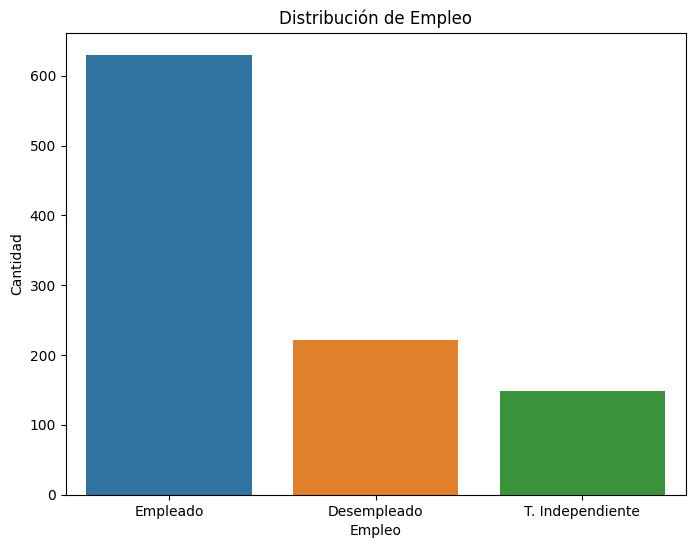

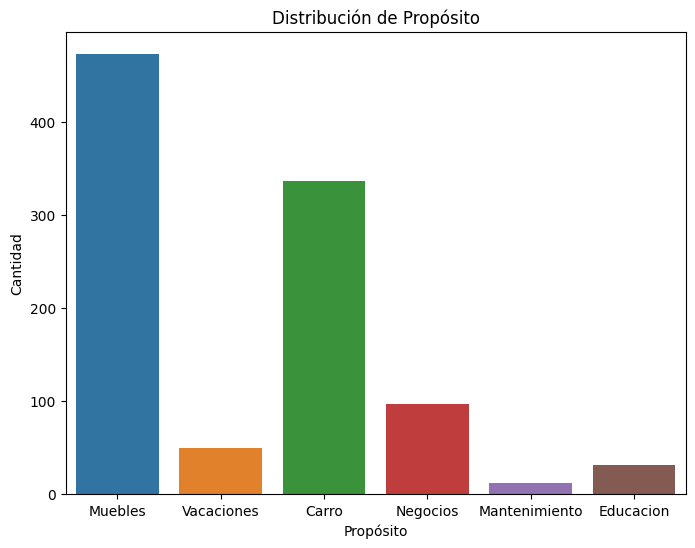

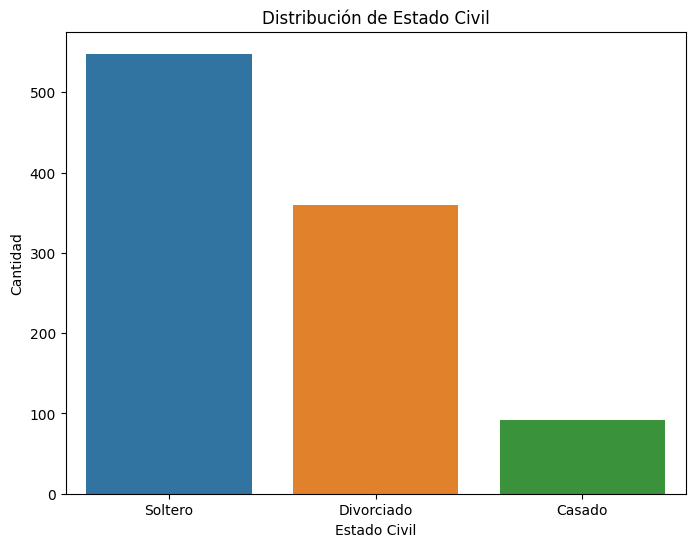

In [10]:
# Crear un bucle para crear gráficos para las siguientes columnas con los nombres y etiquetas iniciales en español: ['job', 'savings', 'credit_history', 'purpose', 'estado_civil']. También usar una paleta que tenga colores diferentes

import matplotlib.pyplot as plt
columnas = ['job', 'purpose', 'estado_civil']
etiquetas = ['Empleo', 'Propósito', 'Estado Civil']
paleta = 'tab10'

for i, columna in enumerate(columnas):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=columna, data=df_banco, palette=paleta)

    # Establecer la etiqueta del eje x
    plt.xlabel(etiquetas[i])

    # Establecer la etiqueta del eje y
    plt.ylabel('Cantidad')

    # Establecer el título
    plt.title(f'Distribución de {etiquetas[i]}')

    # Mostrar el gráfico
    plt.show()


In [11]:
init()

In [12]:
def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex', 'age',
                                    'duration_in_month','credit_amount'])

feature_engineering()

In [13]:
df_banco.head()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,2,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,2,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6
2,0,4,5,5,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1,3
3,0,1,3,2,5,2,2,3,4,2,3,3,1,3,2,0,1,0,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,0,1,0,1,4,2,5


In [14]:
# df_banco.describe()

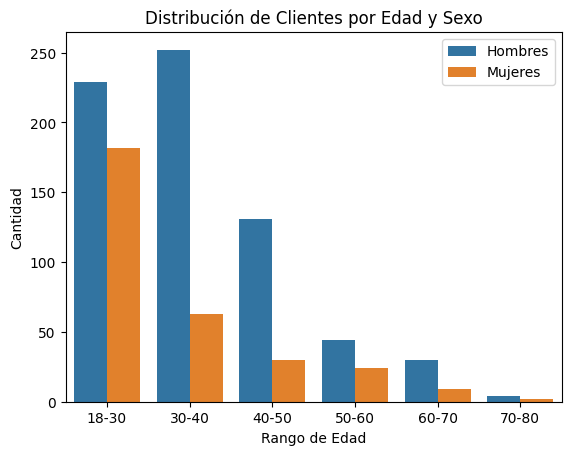

In [15]:
# Create a plot using the count of men and women by age with the 'sex' as the hue, renaming the tags with the actual range of age

# Create a countplot of sex by age group
sns.countplot(x="rango_edad", hue="sexo", data=df_banco)

# Rename the age group labels with the actual ranges
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["18-30", "30-40", "40-50", "50-60", "60-70", "70-80"])

plt.legend(labels=['Hombres', 'Mujeres'])

# Establecer el título
plt.title(f'Distribución de Clientes por Edad y Sexo')

# Set the x-axis label
plt.xlabel("Rango de Edad")

# Set the y-axis label
plt.ylabel("Cantidad")

# Show the plot
plt.show()


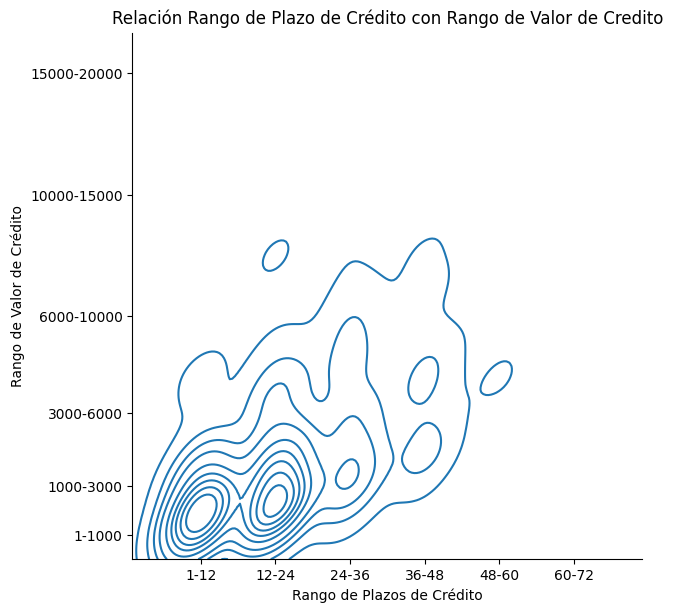

In [16]:
# Crear un gráfico de relación entre 'rango_plazos_credito' y 'rango_valor_credito' utilizando los valores iniciales de las etiquetas para el eje x y solo un cuarto de los valores para el eje y (simplificar los rangos)

# Crear un gráfico de relación entre 'rango_plazos_credito' y 'rango_valor_credito'
sns.displot(x="rango_plazos_credito", y="rango_valor_credito", kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75", data=df_banco)

# Renombrar las etiquetas del eje x e y con los rangos actuales
plt.xticks(ticks=[1, 2, 3, 4, 5, 6], labels=["1-12", "12-24", "24-36", "36-48", "48-60", "60-72"])
plt.yticks(ticks=[1, 3, 6, 10, 15, 20], labels=["1-1000", "1000-3000", "3000-6000", "6000-10000", "10000-15000", "15000-20000"])

# Establecer el título
plt.title(f'Relación Rango de Plazo de Crédito con Rango de Valor de Credito')

# Establecer la etiqueta del eje x
plt.xlabel("Rango de Plazos de Crédito")

# Establecer la etiqueta del eje y
plt.ylabel("Rango de Valor de Crédito")

# Mostrar el gráfico
plt.show()



In [17]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   int64 
 2   credit_history              1000 non-null   int64 
 3   purpose                     1000 non-null   object
 4   savings                     1000 non-null   int64 
 5   present_emp_since           1000 non-null   int64 
 6   installment_as_income_perc  1000 non-null   int64 
 7   other_debtors               1000 non-null   int64 
 8   present_res_since           1000 non-null   int64 
 9   property                    1000 non-null   int64 
 10  other_installment_plans     1000 non-null   int64 
 11  housing                     1000 non-null   int64 
 12  credits_this_bank           1000 non-null   int64 
 13  job                         1000 non-null   objec

#**4. Construcción de Modelos**


---


## Desafíos

1. Analizar los datos de las distribuciones e identificar si hay algún valor o registros que no se deben considerar para el modelo.
2. Investigar qué es y como crear un mapa de calor para analizar la correlación de las variables.
3. Crear una conclusión para cada uno de los gráficos del histograma. Mirar los datos y extraer conclusiones, porque es una habilidad esencial.

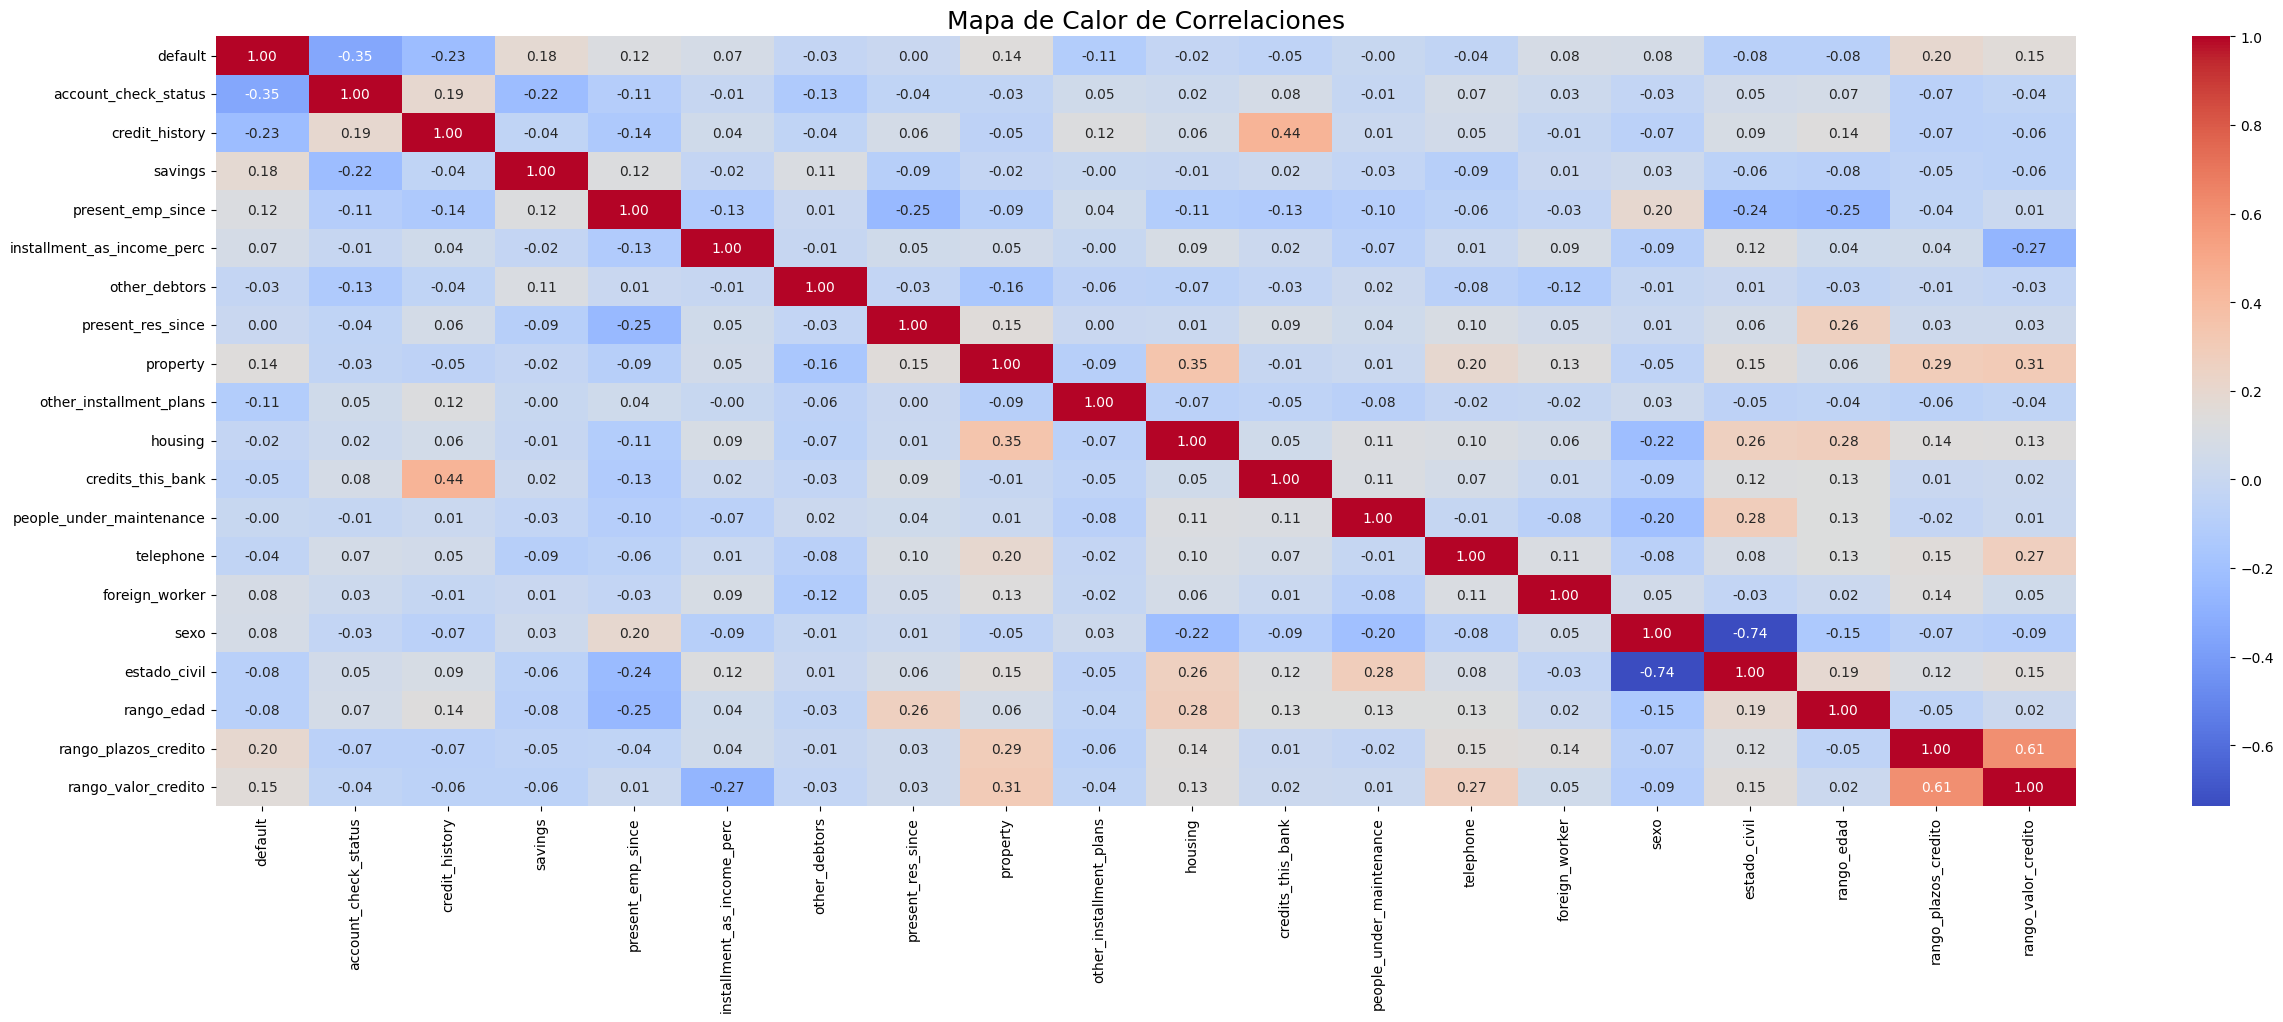

In [18]:
plt.figure(figsize=(30,10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

In [19]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   int64 
 2   credit_history              1000 non-null   int64 
 3   purpose                     1000 non-null   object
 4   savings                     1000 non-null   int64 
 5   present_emp_since           1000 non-null   int64 
 6   installment_as_income_perc  1000 non-null   int64 
 7   other_debtors               1000 non-null   int64 
 8   present_res_since           1000 non-null   int64 
 9   property                    1000 non-null   int64 
 10  other_installment_plans     1000 non-null   int64 
 11  housing                     1000 non-null   int64 
 12  credits_this_bank           1000 non-null   int64 
 13  job                         1000 non-null   objec

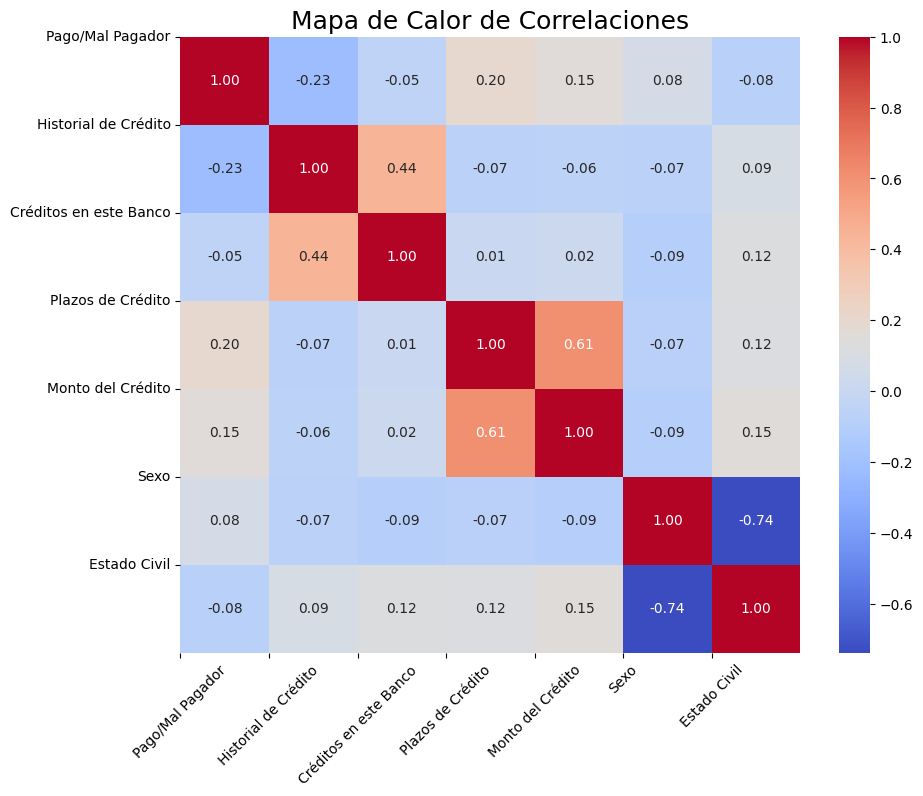

In [20]:
# Mapa de calor con la siguientes columnas: default', 'credit_history', 'credits_this_bank', 'rango_plazos_credito', 'credit_amount', 'sexo', 'estado_civil' con los ticklabels en español

import matplotlib.pyplot as plt
import seaborn as sns

# Select the desired columns
df_subset = df_banco[['default', 'credit_history', 'credits_this_bank', 'rango_plazos_credito', 'rango_valor_credito', 'sexo', 'estado_civil']]

# Create the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_subset.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Set the tick labels in Spanish
tick_labels = ['Pago/Mal Pagador', 'Historial de Crédito', 'Créditos en este Banco', 'Plazos de Crédito', 'Monto del Crédito', 'Sexo', 'Estado Civil']
plt.xticks(ticks=range(len(tick_labels)), labels=tick_labels, rotation=45)
plt.yticks(ticks=range(len(tick_labels)), labels=tick_labels)

# Set the title and show the plot
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()


In [21]:
# prompt: importar las siguientes bibliotecas: train_test_split, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [22]:
# prompt: ejemplo de modelo de machine learning de clasificacion

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Preprocesar los datos
# ... (your preprocessing code here)

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X = df_banco.drop('default', axis=1)
y = df_banco['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. Entrenar el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# 4. Evaluar el modelo
predicciones = modelo.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)
print(f'Accuracy: {accuracy}')

# 5. Mejorar el modelo (opcional)
# ... (your model improvement code here)


Accuracy: 0.78


In [23]:
#@title
def crea_modelos():
  global df_banco, resultados, models, test_x, train_x, train_y, test_y
  y = df_banco['default']
  x = df_banco.drop(columns='default')
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)
      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados = results

In [24]:
crea_modelos()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')

Regresión Logística
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.7954792436426864


Árbol de Decisión
0.7033333333333334
0.4788732394366197
0.3953488372093023
0.43312101910828027
0.61122582047381


Random Forest
0.8033333333333333
0.7647058823529411
0.45348837209302323
0.5693430656934306
0.7864866333405781


Naive Bayes
0.7366666666666667
0.5411764705882353
0.5348837209302325
0.5380116959064327
0.7783633992610303




#**5. Evaluación y Selección del Modelo**


---


In [37]:
#@title
def visualiza_resultados():
  global df_banco, resultados
  results_df = pd.DataFrame(resultados)
  results_df.set_index('Model', inplace=True)

  # Transponer el DataFrame para facilitar la representación
  results_df = results_df.T
  colors = ['#0177b6', '#CDCBF3','#93B0DB', '#DDA89D']

  # Gráfico de barras agrupadas para cada métrica
  results_df.plot(kind='bar', figsize=(12, 6), colormap='Dark2', rot=0)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()

  # @title Texto de título predeterminado
  from IPython.display import HTML, display

  # # Texto que quieres centrar
  # texto = "¿Cuál de estos modelos seleccionarías y por qué?"

  # # Crear una celda HTML con el texto centrado
  # display(HTML(f"<center><h2>{texto}</h2></center>"))

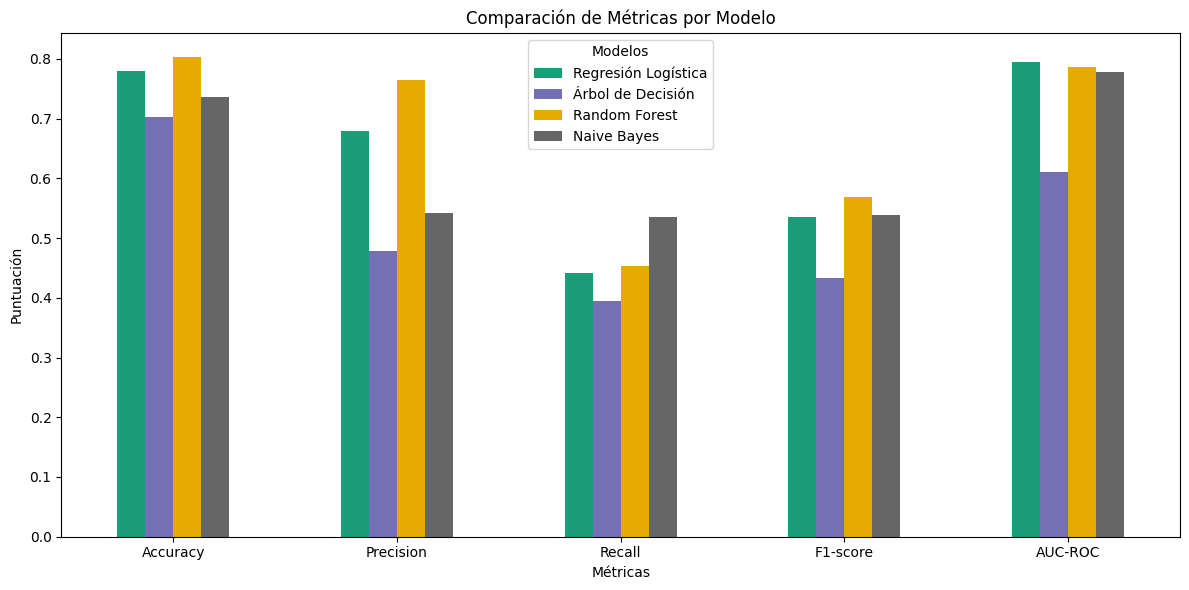

In [43]:
visualiza_resultados()

In [27]:
test_x = X_test
test_y = y_test

for name, model in models.items():
    model.fit(train_x, train_y)

In [41]:
# prompt: Genera la matrix de confusion para los 4 modelos de machine learning utilizados

from sklearn.metrics import confusion_matrix

for name, model in models.items():
    predictions = model.predict(test_x)
    matrix = confusion_matrix(test_y, predictions)
    print(f"Matriz de confusión para {name}:")
    print(matrix)
    print("\n")


Matriz de confusión para LogisticRegression:
[[164  14]
 [ 43  29]]


Matriz de confusión para DecisionTreeClassifier:
[[172   6]
 [ 51  21]]


Matriz de confusión para RandomForestClassifier:
[[176   2]
 [ 19  53]]


Matriz de confusión para GaussianNB:
[[148  30]
 [ 35  37]]




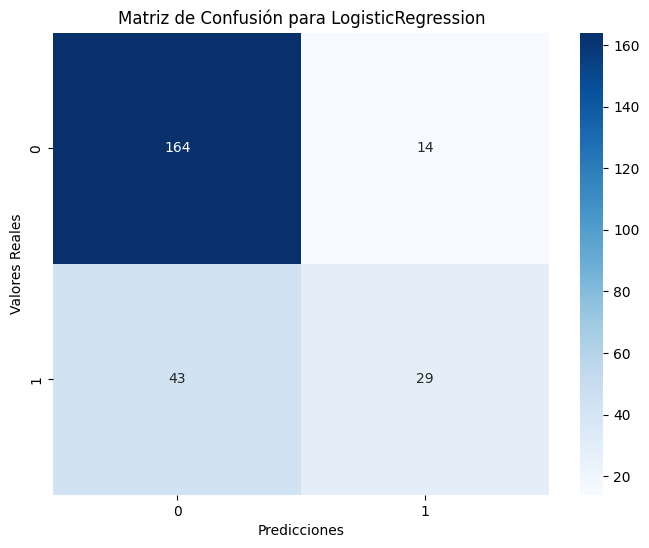

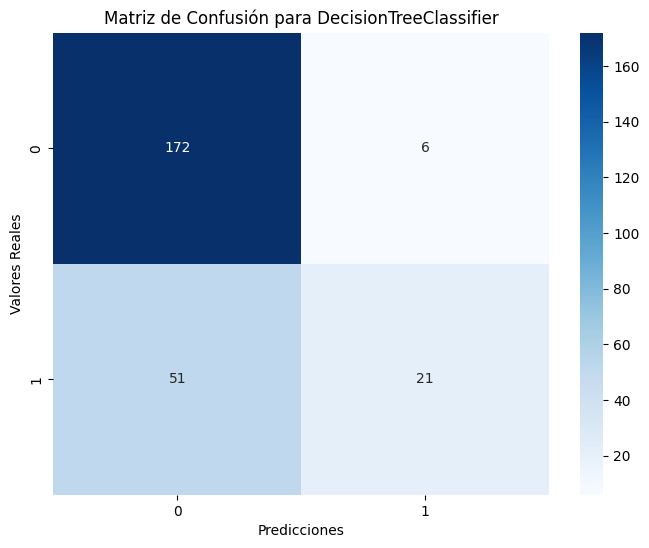

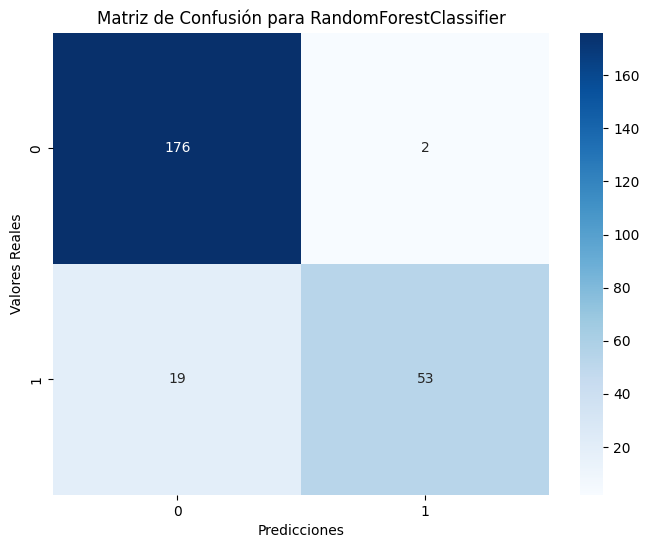

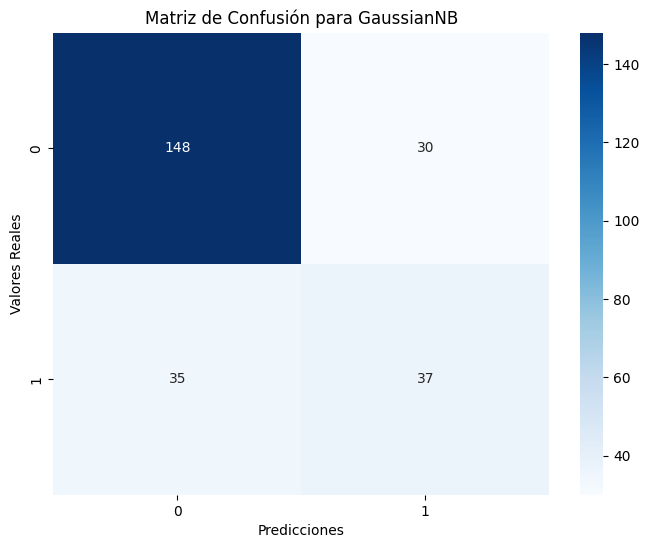

In [42]:
# prompt: Genera graficos para cada matriz de confusion con sus respectivos nombres de modelo

for name, model in models.items():
    predictions = model.predict(test_x)
    matrix = confusion_matrix(test_y, predictions)

    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")

    # Set the title and labels
    plt.title(f"Matriz de Confusión para {name}")
    plt.xlabel("Predicciones")
    plt.ylabel("Valores Reales")

    # Show the plot
    plt.show()


# Evaluacion de Modelos con Hiperparametros

Desafíos:
*   Evaluar la Matrix de Confusión
*   Balancear la variable target
*   Seleccionar sólo algunas variable y reevaluar



In [46]:
# prompt: Balancea la variable 'Default' para obtener nuevos resultados de los modelos

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# Separar las características y la variable objetivo
X = df_banco.drop('default', axis=1)
y = df_banco['default']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 77)

# Aplicar SMOTE para balancear la variable objetivo
smote = SMOTE(random_state=77)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Definir los modelos
models = {
    'Regresión Logística': LogisticRegression(),
    'Árbol de Decisión': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Entrenar y evaluar los modelos con los datos balanceados
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, proba[:, 1])
    else:
        roc_auc = None

    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-score'].append(f1)
    results['AUC-ROC'].append(roc_auc)

# Imprimir los resultados
for i, model in enumerate(results['Model']):
    print(model)
    print(results['Accuracy'][i])
    print(results['Precision'][i])
    print(results['Recall'][i])
    print(results['F1-score'][i])
    print(results['AUC-ROC'][i])
    print('\n')


Regresión Logística
0.75
0.5533980582524272
0.6627906976744186
0.603174603174603
0.7892849380569442


Árbol de Decisión
0.7033333333333334
0.4838709677419355
0.5232558139534884
0.5027932960893855
0.6494783742664638


Random Forest
0.78
0.6351351351351351
0.5465116279069767
0.5874999999999999
0.7667354922842861


Naive Bayes
0.7233333333333334
0.5118110236220472
0.7558139534883721
0.6103286384976525
0.797326668115627




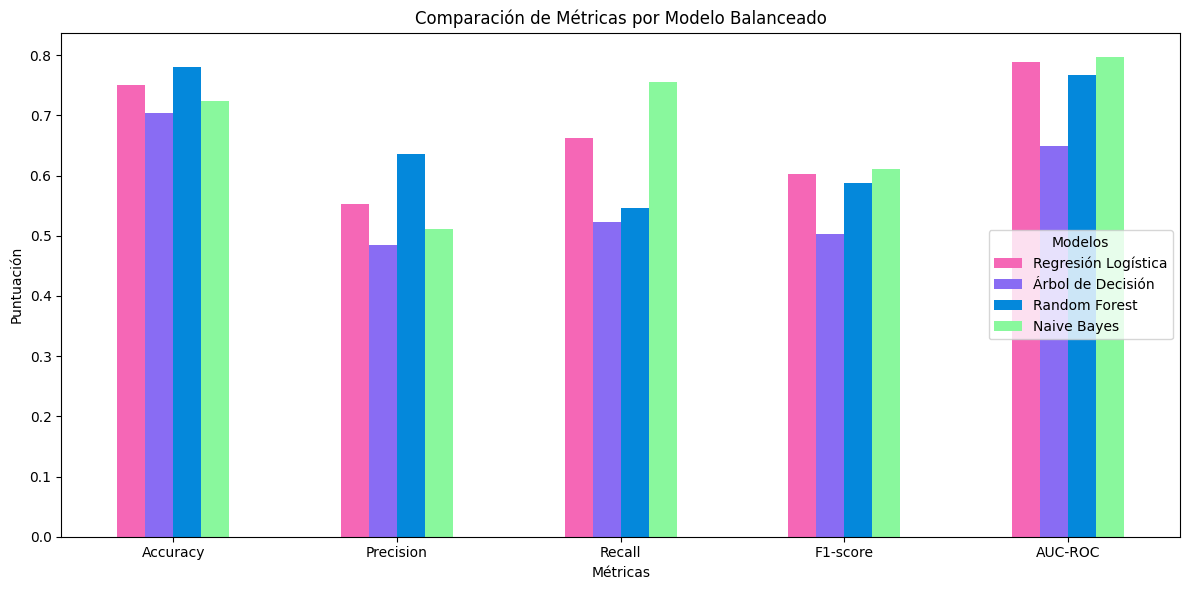

In [58]:
# prompt: Genera los graficos con los nuevos datos de la variable balanceada

import pandas as pd
import matplotlib.pyplot as plt
# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)

# Transponer el DataFrame para facilitar la representación
results_df = results_df.T
color = ['#F567b6', '#896CF3','#0488DB', '#89F89D']

# Gráfico de barras agrupadas para cada métrica
results_df.plot(kind='bar', figsize=(12, 6), colormap='Dark2', rot=0, color=color)
plt.title('Comparación de Métricas por Modelo Balanceado')
plt.xlabel('Métricas')
plt.ylabel('Puntuación')
plt.legend(title='Modelos', loc='right')
plt.tight_layout()
plt.show()



Accuracy: 0.752
Regresión Logística
0.7833333333333333
0.7142857142857143
0.4069767441860465
0.5185185185185186
0.7977613562269072


Árbol de Decisión
0.69
0.43636363636363634
0.27906976744186046
0.3404255319148936
0.6407574440339057


Random Forest
0.7233333333333334
0.5254237288135594
0.36046511627906974
0.42758620689655175
0.6754238209084982


Naive Bayes
0.7933333333333333
0.6463414634146342
0.6162790697674418
0.6309523809523809
0.7837970006520321




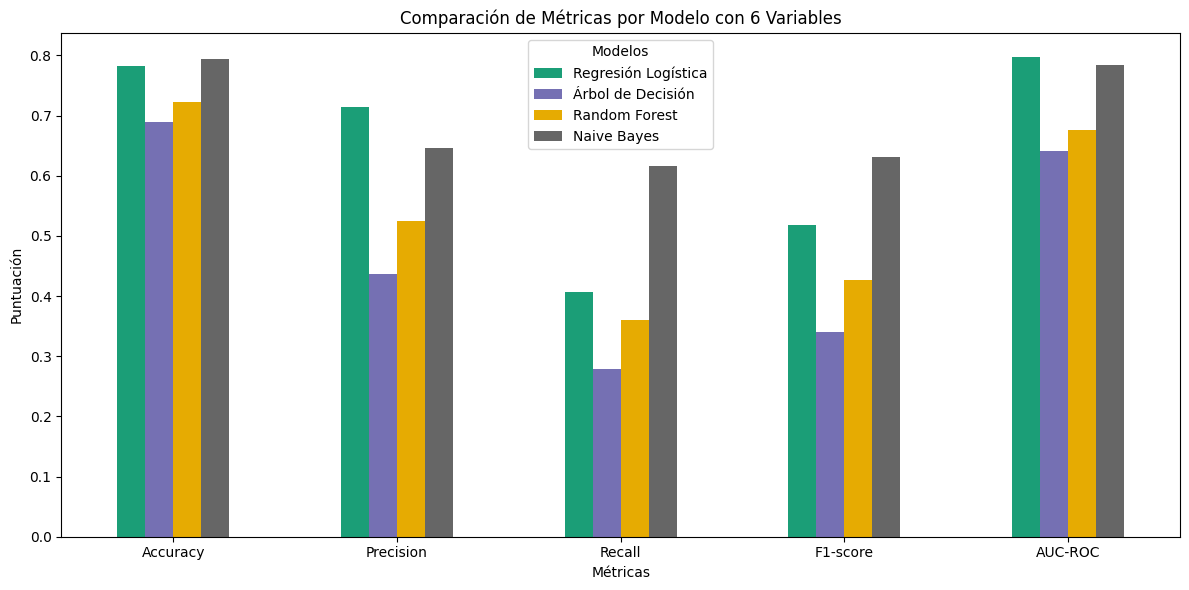

Matriz de confusión para Regresión Logística:
[[164  14]
 [ 47  25]]


Matriz de confusión para Árbol de Decisión:
[[167  11]
 [ 35  37]]


Matriz de confusión para Random Forest:
[[165  13]
 [ 32  40]]


Matriz de confusión para Naive Bayes:
[[148  30]
 [ 30  42]]




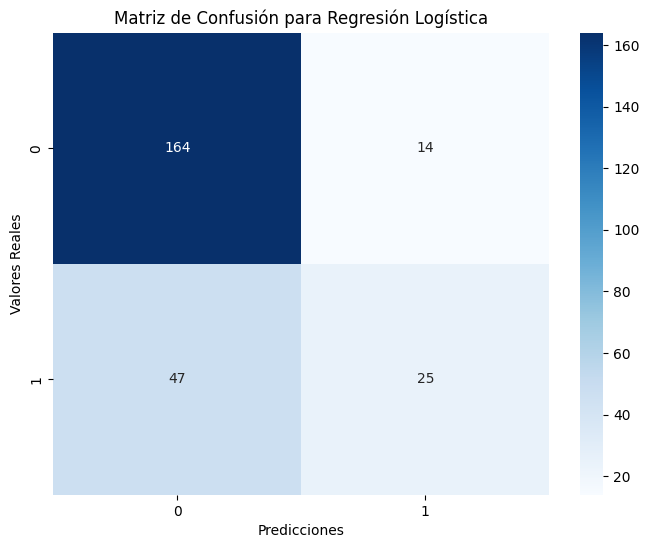

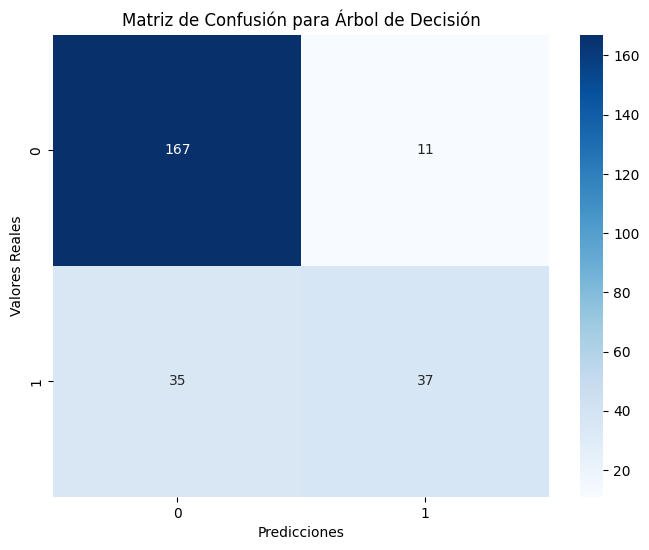

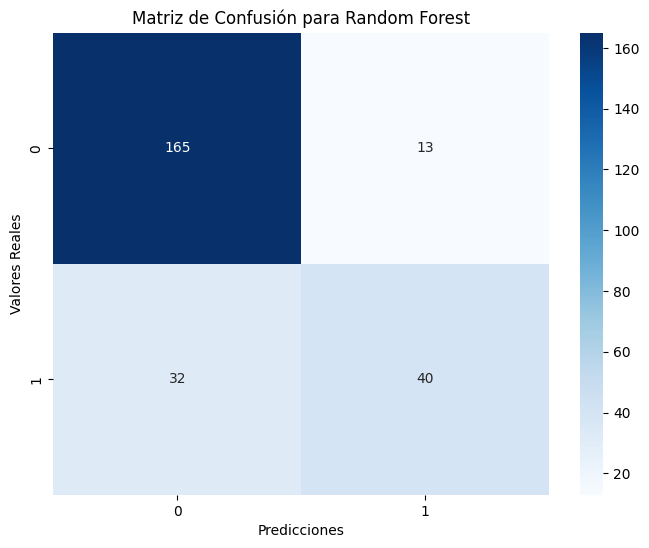

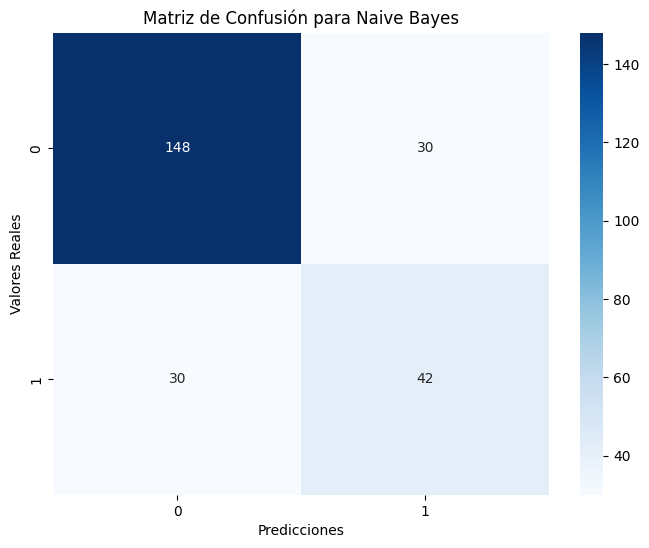

Regresión Logística
0.7366666666666667
0.528
0.7674418604651163
0.6255924170616114
0.8077591827863507


Árbol de Decisión
0.6933333333333334
0.46808510638297873
0.5116279069767442
0.4888888888888889
0.6599923929580527


Random Forest
0.6933333333333334
0.47
0.5465116279069767
0.5053763440860215
0.6878939361008476


Naive Bayes
0.7366666666666667
0.5275590551181102
0.7790697674418605
0.6291079812206573
0.8130841121495327




<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

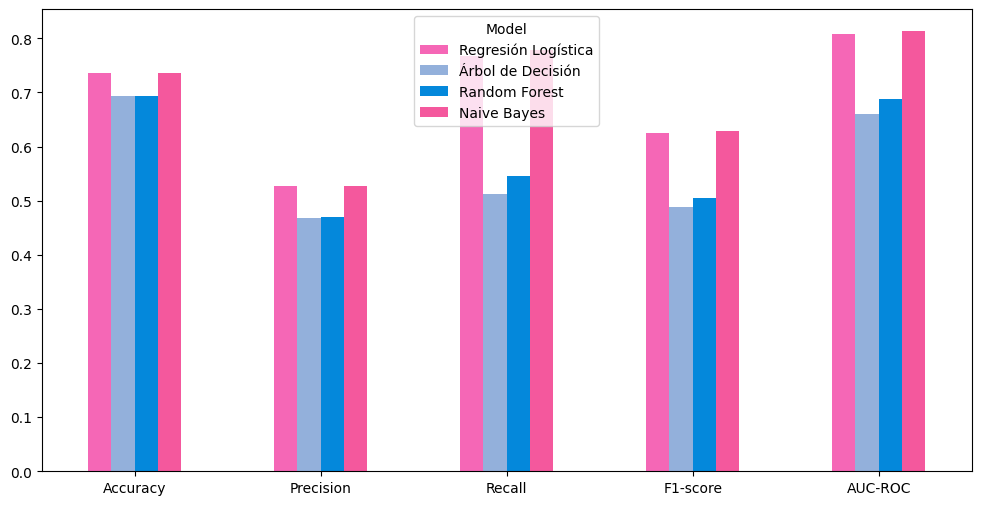

In [64]:
# prompt: Realiza los modelos utilizando ahora solamente 6 columnas de datos

import pandas as pd
import matplotlib.pyplot as plt
# 1. Preprocesar los datos
# ... (your preprocessing code here)

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X = df_banco[['account_check_status', 'credit_history', 'savings', 'present_emp_since', 'other_debtors', 'property']]
y = df_banco['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. Entrenar el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# 4. Evaluar el modelo
predicciones = modelo.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)
print(f'Accuracy: {accuracy}')

# 5. Mejorar el modelo (opcional)
# ... (your model improvement code here)

#@title
def crea_modelos():
  global df_banco, resultados, models, test_x, train_x, train_y, test_y
  y = df_banco['default']
  x = df_banco[['account_check_status', 'credit_history', 'savings', 'present_emp_since', 'other_debtors', 'property']]
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)
      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados = results
crea_modelos()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')
# #**5. Evaluación y Selección del Modelo**
#
#
# ---
#
#@title
def visualiza_resultados():
  global df_banco, resultados
  results_df = pd.DataFrame(resultados)
  results_df.set_index('Model', inplace=True)

  # Transponer el DataFrame para facilitar la representación
  results_df = results_df.T
  colors = ['#0177b6', '#CDCBF3','#93B0DB', '#DF569D']

  # Gráfico de barras agrupadas para cada métrica
  results_df.plot(kind='bar', figsize=(12, 6), colormap='Dark2', rot=0)
  plt.title('Comparación de Métricas por Modelo con 6 Variables')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()

  # @title Texto de título predeterminado

  # # Texto que quieres centrar
  # texto = "¿Cuál de estos modelos seleccionarías y por qué?"

  # # Crear una celda HTML con el texto centrado
  # display(HTML(f"<center><h2>{texto}</h2></center>"))
visualiza_resultados()
test_x = X_test
test_y = y_test

for name, model in models.items():
    model.fit(train_x, train_y)


for name, model in models.items():
    predictions = model.predict(test_x)
    matrix = confusion_matrix(test_y, predictions)
    print(f"Matriz de confusión para {name}:")
    print(matrix)
    print("\n")


for name, model in models.items():
    predictions = model.predict(test_x)
    matrix = confusion_matrix(test_y, predictions)

    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")

    # Set the title and labels
    plt.title(f"Matriz de Confusión para {name}")
    plt.xlabel("Predicciones")
    plt.ylabel("Valores Reales")

    # Show the plot
    plt.show()

# # Evaluacion de Modelos con Hiperparametros
# Desafíos:
# *   Evaluar la Matrix de Confusión
# *   Balancear la variable target
# *   Seleccionar sólo algunas variable y reevaluar
#
#


# Separar las características y la variable objetivo
X = df_banco[['account_check_status', 'credit_history', 'savings', 'present_emp_since', 'other_debtors', 'property']]
y = df_banco['default']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 77)

# Aplicar SMOTE para balancear la variable objetivo
smote = SMOTE(random_state=77)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Definir los modelos
models = {
    'Regresión Logística': LogisticRegression(),
    'Árbol de Decisión': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Entrenar y evaluar los modelos con los datos balanceados
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, proba[:, 1])
    else:
        roc_auc = None

    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-score'].append(f1)
    results['AUC-ROC'].append(roc_auc)

# Imprimir los resultados
for i, model in enumerate(results['Model']):
    print(model)
    print(results['Accuracy'][i])
    print(results['Precision'][i])
    print(results['Recall'][i])
    print(results['F1-score'][i])
    print(results['AUC-ROC'][i])
    print('\n')


# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)

# Transponer el DataFrame para facilitar la representación
results_df = results_df.T
color = ['#F567b6', '#93B0DB','#0488DB', '#F4589D']

# Gráfico de barras agrupadas para cada métrica
results_df.plot(kind='bar', figsize=(12, 6), colormap='Dark2', rot=0, color=color)
plt.title